In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

# Load into DataFrame
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")


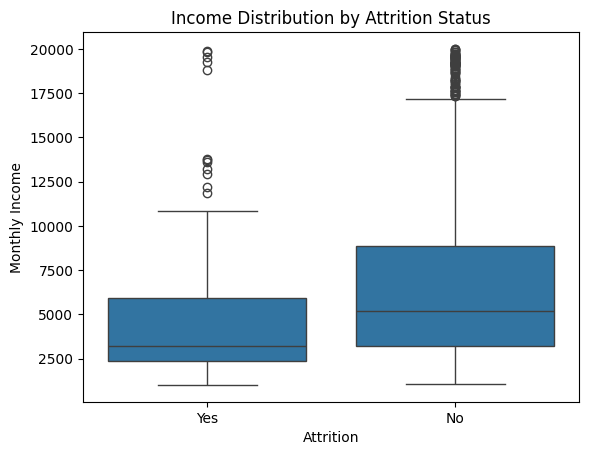

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Income Distribution by Attrition Status")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Convert Attrition to numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Handle missing or unexpected 'Attrition' values
if 'Attrition' in df_encoded.columns and not df_encoded['Attrition'].empty:
    mode_value = df_encoded['Attrition'].mode()
    if not mode_value.empty:
        df_encoded['Attrition'] = df_encoded['Attrition'].fillna(mode_value[0])
    else:
        df_encoded['Attrition'] = df_encoded['Attrition'].fillna(0)
else:
    print("Error: 'Attrition' column is missing or empty in df_encoded.")

# Separate features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Proceed only if data is not empty
if not df_encoded.empty and not X.empty:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
else:
    print("Error: df_encoded or X is empty after preprocessing.")


Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294


Confusion Matrix:
 [[241   6]
 [ 43   4]]


<Figure size 640x480 with 0 Axes>

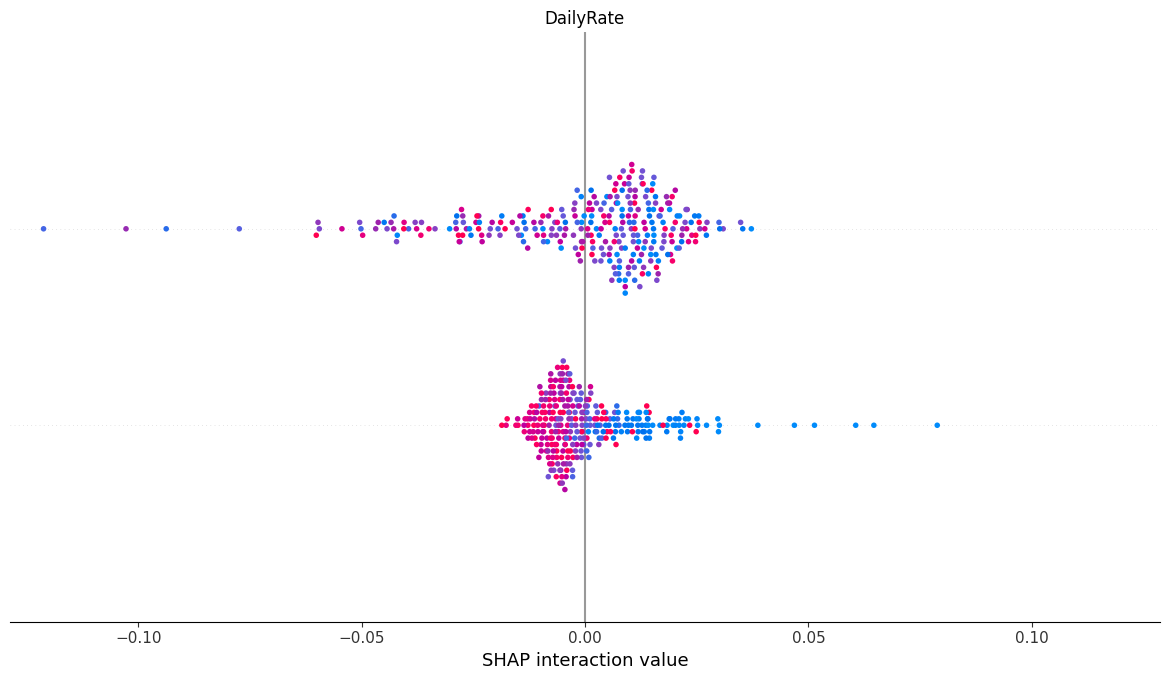

In [7]:
!pip install shap
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
# Check if shap_values is a list (indicating binary classification)
if isinstance(shap_values, list):
    # Use class 1 SHAP values (Attrition = 'Yes') and ensure it's 2D
    shap_values_class1 = shap_values[1]
    # Reshape to 2D if necessary
    if len(shap_values_class1.shape) == 1:
        shap_values_class1 = shap_values_class1.reshape(1, -1)
    shap.summary_plot(shap_values_class1, X_test) # Fixed indentation here
else:
    # For multi-class or regression, use the shap_values directly
    shap.summary_plot(shap_values, X_test)